In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [154]:
Gaming_sales=pd.read_csv("Desktop\\Video_Games_Sales_as_at_22_Dec_2016.csv")

In [155]:
Gaming_sales.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
Gaming_sales.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [157]:
Gaming_sales.shape

(16719, 16)

In [158]:
Gaming_sales=Gaming_sales.dropna()

In [159]:
Gaming_sales.shape

(6825, 16)

In [160]:
training_data=Gaming_sales.iloc[:,[2,5,6,7,8,10,11,12,13]]
testing_data=Gaming_sales.iloc[:,[9]]

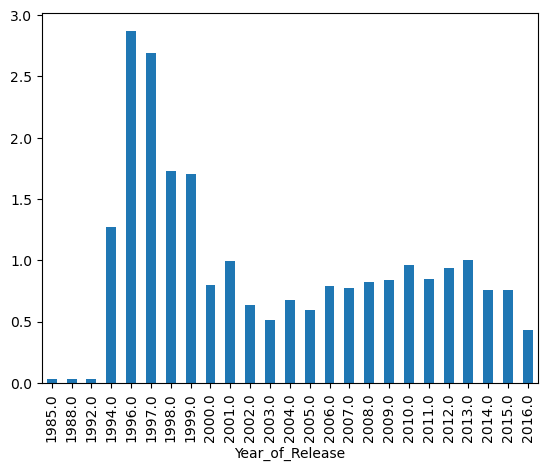

In [161]:
Gaming_sales.groupby("Year_of_Release")["Global_Sales"].agg(np.mean).plot(kind="bar")
plt.show()

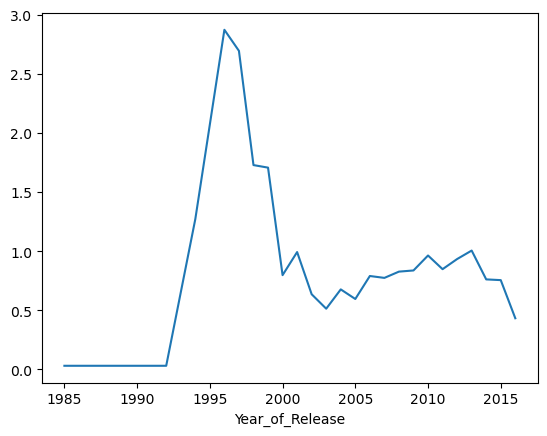

In [162]:
Gaming_sales.groupby("Year_of_Release")["Global_Sales"].agg(np.mean).plot(kind="line")
plt.show()

C:\Users\mm\AppData\Local\Temp\ipykernel_20964\4060997997.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Gaming_sales.corr(),cmap="winter_r")


<Axes: >

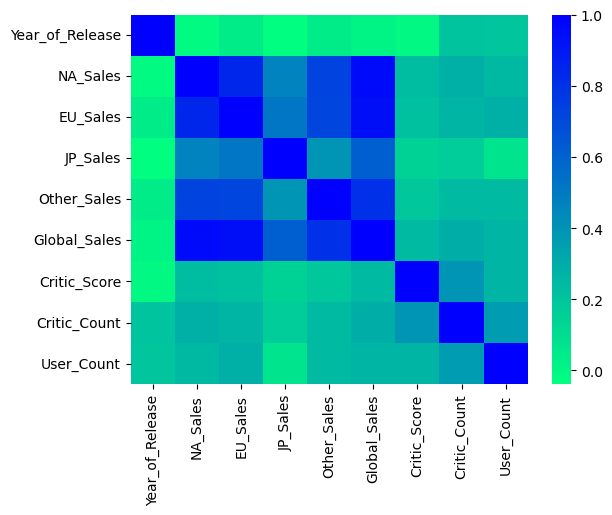

In [163]:

sns.heatmap(Gaming_sales.corr(),cmap="winter_r")

In [164]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(training_data,testing_data,test_size=0.2,random_state=42)

In [165]:
from sklearn.linear_model import LinearRegression
Linear= LinearRegression()
Linear.fit(x_train,y_train)

LinearRegression()

In [166]:
Linear.score(x_train,y_train)

0.9999915996898531

In [167]:
Linear.predict(x_test)

array([[6.02948056],
       [0.44016055],
       [0.23027352],
       ...,
       [0.22013017],
       [0.04013691],
       [0.96024504]])

In [168]:
y_test

,Global_Sales
146,6.03
4427,0.44
6970,0.23
3885,0.51
11023,0.09
...,...
2447,0.85
14897,0.03
7156,0.22
13120,0.05
